# Téma: Jak souvisí počasí s kriminalitou?

### Jak měřit počasí?
Na začátku je klíčové zvolit vhodné faktory, podle kterých lze hodnotit počasí. Tyto faktory je nutné propojit s jednotlivými oblastmi a časovými úseky, abychom mohli zkoumat jejich souvislost s kriminalitou. Následující parametry jsou navrženy jako relevantní měřítka:

- **Srážky**:
Množství srážek se měří v milimetrech za určitý časový úsek, například za 24 hodin. 1 milimetr srážek představuje množství 1 litru vody spadlé na 1 metr čtvereční. Data o srážkách lze lokalizovat podle regionů a mapovat na konkrétní oblasti, kde došlo ke kriminalitě. Dále je možné data o srážkách agregovat (např. průměrné denní, týdenní nebo měsíční hodnoty) a vytvořit korelace mezi intenzitou deště a kriminalitou.

- **Vítr:**
Rychlost větru se udává v metrech za sekundu nebo kilometrech za hodinu. Je otázkou, zda vítr skutečně ovlivňuje kriminalitu. Proto lze tuto proměnnou považovat za doplňkovou a má jí vliv zkoumat pouze tehdy, pokud jsou k dispozici dostatečně kvalitní údaje.

- **Teplota vzduchu:**
Teplota je zásadní faktor, který lze měřit v průměrných denních hodnotách, maximálních/minimálních teplotách nebo v konkrétních hodinových intervalech. Vysoké teploty mohou například vést ke zvýšené agresivitě (podle psychologických studií) nebo mohou být spojeny s vyšší koncentrací lidí ve veřejném prostoru. Teplotní data jsou obvykle snadno dostupná a lze je dobře lokalizovat.

- **Sezóna:**
Roční období (jaro, léto, podzim, zima) a jednotlivé měsíce jsou důležitými indikátory sezónních trendů v kriminalitě. Například zimní období může být spojeno s poklesem venkovní kriminality (např. krádeže na ulici), zatímco v létě mohou být častější konflikty mezi lidmi na veřejných místech. Data lze snadno rozdělit podle kalendářních měsíců nebo čtvrtletí.

- **Délka slunečního svitu:**
Délka slunečního svitu se měří v hodinách denně. Kriminalita může být ovlivněna tím, kolik času lidé tráví venku za denního světla. Kratší zimní dny mohou například snižovat počet krádeží, zatímco dlouhé letní dny mohou zvyšovat výskyt některých druhů přestupků. Tato data lze získat z meteorologických stanic.

- **Atmosférický tlak:**
Atmosférický tlak se měří v hektopascalech (hPa) a je užitečný pro sledování různých povětrnostních jevů, jako jsou bouřky nebo mlhy. Nízký tlak může být spojen s nepříznivými povětrnostními podmínkami, které mohou snížit pravděpodobnost venkovní kriminality. Tento parametr by však měl být použit s opatrností, protože jeho přímý vliv na kriminalitu je méně zřejmý.

Zvolmíme parametr sezóna. Důvodem je osobní preference a dobrá dostupnost dat.

### Dataset

Dataset obsahuje udaje o kriminalite v rocich 2018 az 2024. Od jineho clena tymu mame vytvoreny atribut `region`, tedy kraje Ceske republiky.

In [2]:
import pandas as pd

# load the dataset
df = pd.read_csv('../data/processed/updated_regions.csv')

### Interpretace sezóny

- Jako sezónu zvolme roční období. Tedy podle mesíců rozdělme data o kriminalitě. Na základě sloupce `date`, určeme období `season`, kde možné hodnoty budou `spring`, `summer`, `autumn` a `winter`. Rozhodl jsem se nepřiřazovat čísla, protože čísla mají od sebe různé vzdálenosti, což by se mohlo zdát správně, ale jaro by nenavazovalo na zimu.

**Vyřadili jsme rok 2024**, protože neměl kompletní záznam v 2. polovině roku v době vzniku práce.

Pro jednoduchost rozdělíme data podle měsíců na roční období takto:

- **Spring (jaro):** březen, duben, květen
- **Summer (léto):** červen, červenec, srpen
- **Autumn (podzim):** září, říjen, listopad
- **Winter (zima):** prosinec, leden, únor

In [3]:
month_num_to_label = {
    1 : 'January',
    2:  'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}

month_to_season = {
    'January' : 'Winter',
    'February' :  'Winter',
    'March' : 'Spring',
    'April' : 'Spring',
    'May' : 'Spring',
    'June' : 'Summer',
    'July' : 'Summer',
    'August' : 'Summer',
    'September' : 'Autumn',
    'October' : 'Autumn',
    'November' : 'Autumn',
    'December' : 'Winter'
}

# datetime string to season
df['month'] = df['date'].apply(lambda datetime_str: int(str(datetime_str)[5:7]))
df['year'] = df['date'].apply(lambda datetime_str: int(str(datetime_str)[:4]))
df['month'] = df['month'].apply(lambda month_num: month_num_to_label[month_num])
df['season'] = df['month'].apply(lambda month: month_to_season[month])

df = df[df['year'] != 2024]

df['date'].head()

0    2018-01-05T00:01:00.0000+01:00
1    2018-01-05T00:01:00.0000+01:00
2    2018-01-05T00:01:00.0000+01:00
3    2018-01-08T17:55:00.0000+01:00
4    2018-01-08T17:55:00.0000+01:00
Name: date, dtype: object

35     Winter
36     Winter
94     Winter
95     Winter
248    Winter
Name: season, dtype: object
24513590    Winter
24513619    Winter
24513620    Winter
24513623    Winter
24513624    Winter
Name: season, dtype: object


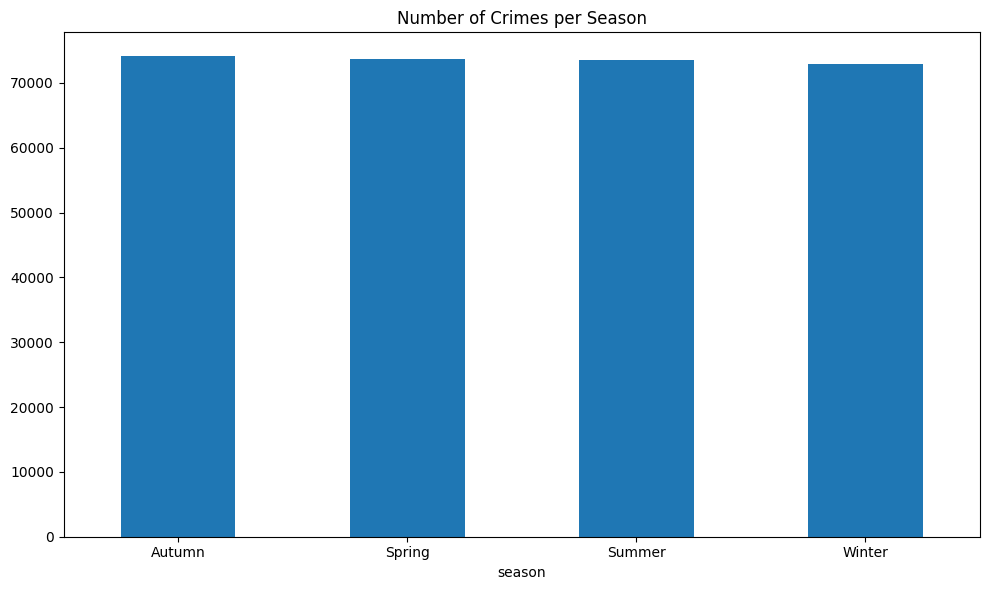

In [45]:
print(df['season'].head())
print(df['season'].tail())

import matplotlib.pyplot as plt

season_counts = df['season'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar')
plt.title('Number of Crimes per Season')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Otázky k sezónám

- Které typy zločinů jsou nejčastější v jednotlivých sezónách?
- Liší se distribuce zločinů mezi sezónami (např. násilné zločiny vs. majetkové zločiny)?
- Existují zločiny, které vykazují sezónní vrchol (např. krádeže v létě, násilné činy v zimě)?

types     1    2     3     4     5     6    7     8     9    10   ...    122  \
season                                                            ...          
Autumn  19805  221  2402  2061  7931  3402   25  7281   882  301  ...  57689   
Spring  20230  214  2176  2022  8347  3651   16  7508   921  365  ...  61405   
Summer  22235  202  2432  2074  9716  3797   21  8452  1005  335  ...  59639   
Winter  19129  196  2285  1860  7357  3433   18  6964   902  352  ...  56444   

types    123     124  125    126   127  129  130    131     132  
season                                                           
Autumn   891  163363    0  56954  2575    0  315  36790   70398  
Spring   899  175088    0  49819  2578    4  348  44990  106881  
Summer  1188  193186    1  55599  2783    0  446  40666   59358  
Winter   780  139165    1  51257  2719    0  110  34166   83790  

[4 rows x 123 columns]


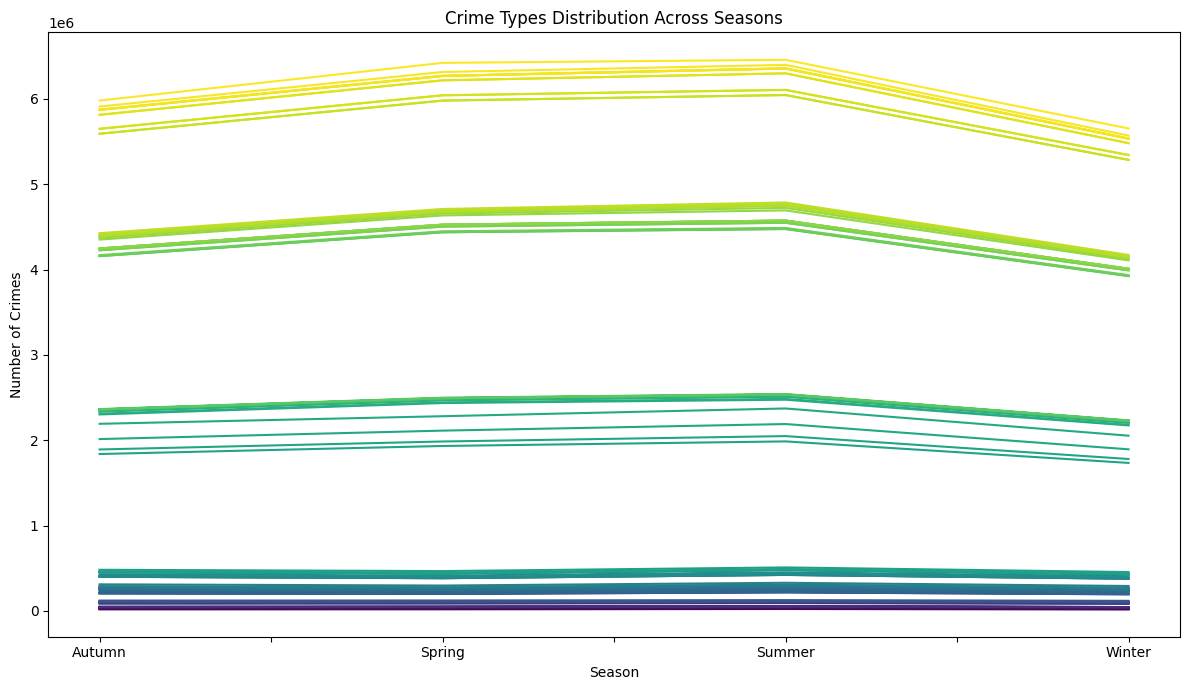

In [12]:
season_type_counts = df.groupby(['season', 'types']).size().unstack(fill_value=0)
print(season_type_counts)

season_type_counts.plot(stacked=True, figsize=(12, 7), colormap='viridis', legend=None)
plt.title('Crime Types Distribution Across Seasons')
plt.ylabel('Number of Crimes')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Vyse muzeme videt pocty zlocinu v sezonach v jednotlivych kategoriich. Zatim neni patrne, jak jednotlive kategorie zloci souvisi se sezonami. Je pouze patrne, ze celkove je nejvice zlocinu na jare a v lete.

In [13]:
df_types = pd.read_csv('../data/processed/202412/types.csv')

df_types[['name', 'label']]


,name,label
0,Násilná,NÁSILNÁ TRESTNÁ ČINNOST
1,Násilná,vražda
2,Násilná,loupež
3,Násilná,vydírání
4,Násilná,Výtržnictví (bez mravnostního charakteru)
...,...,...
127,PŘ – Na úseku používání výbušnin,Na úseku používání výbušnin
128,PŘ – Na úseku obrany České republiky,Na úseku obrany České republiky
129,PŘ – Na úseku zemědělství myslivosti a rybářství,Na úseku zemědělství myslivosti a rybářství
130,PŘ – Ze zákona o pobytu cizinců,Ze zákona o pobytu cizinců


### Volba typu kriminality, u které budeme zkoumat závislost na sezóně

Jako zajímavé téma jsme vyhodnotili zkoumat závislost sezón na vloupání.

Dle dostupné literatury můžeme předpokládat, že maximum krádeží je v zimních měsících. Možné faktory:

- Finanční nouze.

- Méně lidí venku (nesnadná viktimizace pachatelů).

### Konkrétní hypotézy

- **H_0**: Počet vloupání nezávisí na sezóně. Jinými slovy, distribuce vloupání mezi sezónami je rovnoměrná.
- **H_1**: Počet vloupání závisí na sezóně. Očekáváme, že v zimních měsících je vyšší počet vloupání než v ostatních sezónách.

#### Určení loupeží v datasetu

Loupeže jsou vedeny pod kategoriemi 18 až 34, kde 18 je kategorie nadřazená kategoriím 19 až 34.

#### Čištění dat:

- Při zkoumání typů zločinnů jsem manuálně sjednotil typy bez podtridy, aby byly povazované za stejný typ zlocinu.

In [15]:
burglary_labels = list(range(18,34+1))

f'burglary labels list: {burglary_labels}'

df = df[df['types'].isin(burglary_labels)]

,id,x,y,mp,date,state,relevance,types,region_name,month,year,season
35,9652683,17.017791,49.950179,False,2018-01-01T00:14:00.0000+01:00,1,4,18,Olomoucky,January,2018,Winter
36,9652683,17.017791,49.950179,False,2018-01-01T00:14:00.0000+01:00,1,4,22,Olomoucky,January,2018,Winter
94,9658459,14.552777,50.042549,False,2018-01-01T00:03:00.0000+01:00,1,4,18,HlavniMestoPraha,January,2018,Winter
95,9658459,14.552777,50.042549,False,2018-01-01T00:03:00.0000+01:00,1,4,34,HlavniMestoPraha,January,2018,Winter
248,9659544,17.558204,49.037152,False,2018-01-01T13:40:00.0000+01:00,2,4,18,Zlinsky,January,2018,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
24513590,24901970,16.597896,49.218866,False,2023-12-12T15:53:00.0000+01:00,2,4,27,Jihomoravsky,December,2023,Winter
24513619,24978509,14.480551,50.860076,False,2023-12-25T22:19:00.0000+01:00,2,4,18,Ustecky,December,2023,Winter
24513620,24978509,14.480551,50.860076,False,2023-12-25T22:19:00.0000+01:00,2,4,34,Ustecky,December,2023,Winter
24513623,25008949,14.480551,50.860076,False,2023-12-20T12:51:00.0000+01:00,2,4,18,Ustecky,December,2023,Winter


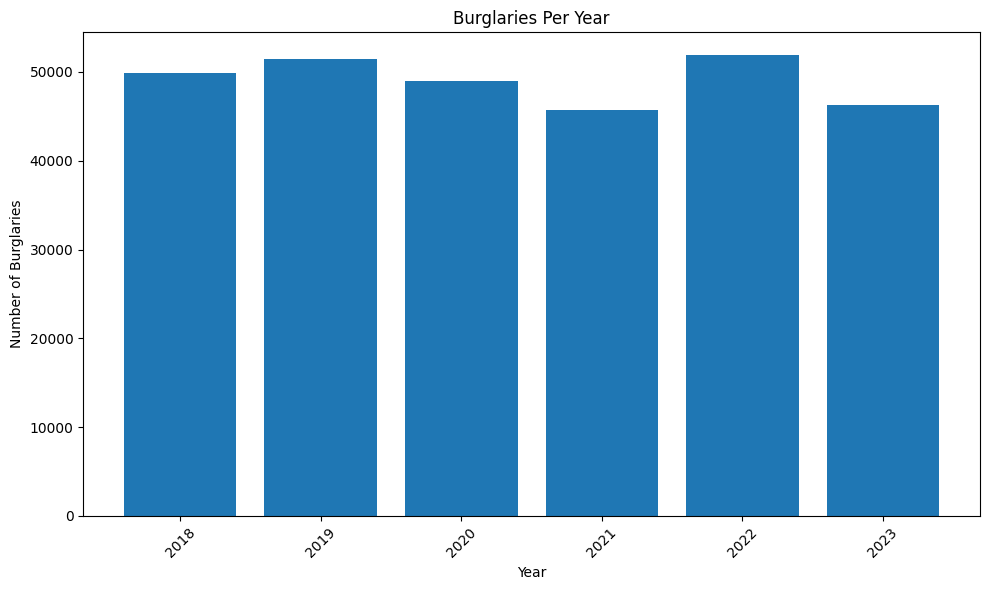

In [43]:
# plots to get better understanding of the dataset

year_counts = df.groupby('year')['year'].count()

plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.title('Burglaries Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Burglaries')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show() 

Očekávané hodnoty: [np.float64(73559.0), np.float64(73559.0), np.float64(73559.0), np.float64(73559.0)]


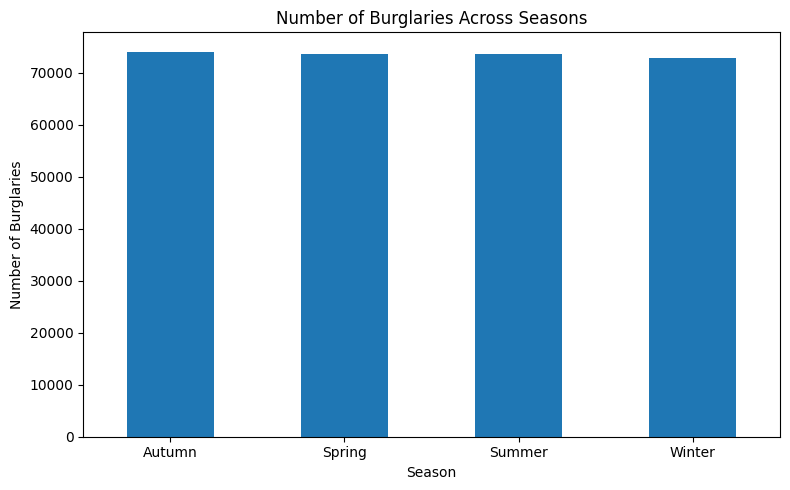

In [44]:
season_burglary_counts = df['season'].value_counts().sort_index() 

total_burglaries = season_burglary_counts.sum()
expected_counts = [total_burglaries / len(season_burglary_counts)] * len(season_burglary_counts)
print("Očekávané hodnoty:", expected_counts)

season_burglary_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Number of Burglaries Across Seasons')
plt.ylabel('Number of Burglaries')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Testovani hypotez

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency([season_burglary_counts.values, expected_counts])

print(f"Chi-squared statistic: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-squared statistic: 5.14
Degrees of freedom: 3
P-value: 0.1622


### Nelze zamítnout nulovou hypotézu

P-value >= 5%, proto nelze tvrdit, že závisí na sezóně. TODO okomentovat!